# Regressão Linear

A regressão linear é um conceito fundamental no campo do 'aprendizado de máquina supervisionado'. Ela é uma técnica estatística que permite modelar a relação entre uma variável dependente (**target, ou alvo**) e uma ou mais variáveis independentes (**features, ou características**) por meio de uma equação linear. O objetivo da regressão linear é encontrar uma linha reta que melhor se ajuste aos dados de treinamento para prever a variável dependente com base nas variáveis independentes.


Neste trabalho analisaremos uma base de dados da UCI Machine Learning Repository e utilizaremos o algoritmo dos mínimos quadrados treinado pelo **Gradiente Descente**  para fazer previsões a partir dos dados de treinamento.

# Conjunto de Dados de Ruído de Perfil Aerodinâmico

## Introdução

O [conjunto de dados de ruído de perfil aerodinâmico](https://archive.ics.uci.edu/dataset/291/airfoil+self+noise) é uma coleção de dados amplamente utilizada na área de engenharia aeroespacial e acústica. Ele contém informações relacionadas ao ruído gerado por perfis aerodinâmicos, que são usados em uma variedade de aplicações, como asas de aeronaves e pás de turbinas eólicas.

## Conteúdo do Conjunto de Dados

Este conjunto de dados contém as seguintes informações:

- **Frequency (Hz)**: A frequência do ruído em hertz.
- **Angle of Attack (degrees)**: O ângulo de ataque do perfil aerodinâmico em graus.
- **Chord Length (meters)**: O comprimento da corda do perfil aerodinâmico em metros.
- **Free-Stream Velocity (m/s)**: A velocidade do fluxo livre em metros por segundo.
- **Suction Side Displacement Thickness (meters)**: A espessura de deslocamento do lado de sucção do perfil aerodinâmico em metros.
- **Scaled Sound Pressure Level (dB)**: O nível de pressão sonora em decibéis, que é a variável alvo ou de saída.

## Objetivo do Conjunto de Dados

O principal objetivo deste conjunto de dados é permitir a análise e modelagem do ruído gerado por perfis aerodinâmicos em diferentes condições de operação.

Este conjunto de dados oferece uma oportunidade valiosa para explorar a relação entre características de perfil aerodinâmico e a emissão de ruído.


Dessa forma, para nossa análise, temos como o conjunto de features as colunas:

- **Frequency (Hz)**
- **Angle of Attack (degrees)**
- **Chord Length (meters)**
- **Free-Stream Velocity (m/s)**
- **Suction Side Displacement Thickness (meters)**

E como target temos a coluna **Scaled Sound Pressure Level (dB)**.


Primeiramente, iremos importar as bibliotecas necessárias para nossa análise.

In [47]:
from sklearn.base import BaseEstimator
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Carregando o dataset

In [48]:
#criando um dataframe para receber os dados do arquivo csv

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Regressão Linear/airfoil_self_noise.dat', delimiter='\t')
print(data.head())

    800    0  0.3048  71.3  0.00266337  126.201
0  1000  0.0  0.3048  71.3    0.002663  125.201
1  1250  0.0  0.3048  71.3    0.002663  125.951
2  1600  0.0  0.3048  71.3    0.002663  127.591
3  2000  0.0  0.3048  71.3    0.002663  127.461
4  2500  0.0  0.3048  71.3    0.002663  125.571


Para a aplicação dos algoritmos será necessário dividirmos nosso dataset em uma matriz X que contenha as colunas relacionadas as features e em uma coluna y que representará nosso target.

# Divisão do Conjunto de Dados para Treinamento e Teste em Aprendizado de Máquina

Em aprendizado de máquina, um passo crítico no desenvolvimento de modelos é a divisão do conjunto de dados em duas partes distintas: uma para **treinamento** e outra para **teste**. Esse processo é fundamental para avaliar a capacidade de generalização do modelo.

## Conjunto de Dados de Treinamento

O **conjunto de dados de treinamento** é usado para alimentar o modelo durante o processo de treinamento. Ele contém uma porção significativa dos dados disponíveis e é usado para que o modelo aprenda as relações e padrões nos dados, ajustando seus parâmetros.

## Conjunto de Dados de Teste

O **conjunto de dados de teste**, por outro lado, é reservado para avaliar o desempenho do modelo depois que ele foi treinado. Esse conjunto não é usado durante o treinamento e deve ser mantido separado do conjunto de treinamento para garantir uma avaliação imparcial do modelo.


In [49]:
data_matrix = data.to_numpy()

lines = data.shape[0]
columns = data.shape[1]

X = data_matrix[0:lines+1, 0:columns]
y = data_matrix[:, columns - 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - 0.8, random_state=42)

# Aprendizado por Solução Analítica

A Solução Analítica, é um meio direto para encontrar os melhores valores dos parâmetros(thetas) no modelo de regressão linear.

$$
\theta = \frac{2}{m}(X^T X)^{-1} X^T y
$$

# Aprendizado com Gradiente Descendente

## Introdução

O **gradiente descendente** é uma técnica fundamental no campo do aprendizado de máquina e otimização. É amplamente utilizado para treinar modelos de machine learning, como redes neurais, regressões lineares e muitos outros algoritmos. A ideia central por trás do gradiente descendente é minimizar uma função de custo ajustando iterativamente os parâmetros do modelo.

## Funcionamento do Gradiente Descendente

O processo do gradiente descendente pode ser resumido em três etapas:

1. **Inicialização dos Parâmetros**: Começa-se com uma inicialização aleatória (ou outra estratégia) dos parâmetros do modelo que se deseja otimizar.

2. **Cálculo do Gradiente**: Calcula-se o gradiente da função de custo em relação aos parâmetros do modelo. O gradiente indica a direção e magnitude do ajuste necessário para minimizar a função de custo.

Temos que a hipótese do algoritmo é dada por:

$$
h_{\theta}(x) = {\theta}_0 + {\theta}_1x_1 + {\theta}_2x_2 + ... + {\theta}_nx_n
$$

Nesse sentido, os thetas representam os parâmetros(pesos) associados a cada feature do exemplo, representadas por x.

Já a função de custo é dada por:
$$
J(\theta_1, \theta_2, ..., \theta_n) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\theta} (x^{(i)}) - y^{(i)} \right)^2
$$

3. **Atualização dos Parâmetros**: Os parâmetros do modelo são atualizados na direção oposta ao gradiente, multiplicados por uma taxa de aprendizado alpha. Isso significa que os parâmetros são ajustados gradualmente na direção que minimiza a função de custo. A fórmula de atualização dos parâmetros é:

$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)
$$
## Taxa de Aprendizado

A **taxa de aprendizado** alpha é um hiperparâmetro importante no gradiente descendente. Ela controla o tamanho dos passos de atualização dos parâmetros. Uma taxa de aprendizado muito alta pode resultar em convergência instável, enquanto uma taxa muito baixa pode levar a convergência lenta ou ficar presa em mínimos locais.


## Convergência e Ajustes

O processo de treinamento com gradiente descendente é repetido até que a função de custo convirja para um mínimo ou até que um critério de parada seja atingido.

O gradiente descendente é uma técnica poderosa e essencial para treinar modelos de aprendizado de máquina. Com uma configuração adequada dos parâmetros e um gerenciamento cuidadoso, o gradiente descendente pode ser usado para treinar modelos que fazem previsões precisas.


In [50]:
def h(theta, X, line):

    hypotesis = 0
    for j in range(0, len(theta)):
      hypotesis += theta[j] * X[line][j]

    return hypotesis

class LMSTrainer(BaseEstimator):
    def __init__(self, analitic=False):

            self.analitic = analitic
            self._trained = False
            self.theta = []

    def fit(self, X, y):

        if self.analitic:
          self.theta = [0] * X.shape[1]
          m = len(y)

          X_transpose = X.transpose()
          self.theta[:] = (2/m) * np.linalg.pinv(X_transpose @ X) @ X_transpose @ y
          self._trained = True
          pass
        else:
          bias = [1] * len(y)
          X = np.insert(X, 0, bias, axis=1)
          learning_rate = 0.00000001
          m = len(y)
          num_epochs = 70000
          iteration = 0
          cost_history = []

          self.theta = [0] * X.shape[1]
          temp_theta = [0] * len(self.theta)

          hip = np.dot(X, self.theta)
          while(iteration < num_epochs):
            cost = 0

            temp_theta[0] = self.theta[0] - learning_rate * sum(hip - y)

            for j in range(1, len(self.theta)):
              temp_theta[j] = self.theta[j] - learning_rate * (1/m) * sum((hip - y) * X[:,j])

            for j in range(0, len(self.theta)):
              self.theta[j] = temp_theta[j]

            hip = np.dot(X, self.theta)
            cost = (1/m) * sum(hip - y)
            # print(cost)
            cost_history.append(abs(cost))
            iteration += 1
          # Crie o gráfico de erro
          plt.plot(cost_history)
          plt.title('Função de Custo')
          plt.xlabel('Número de Iterações')
          plt.ylabel('Custo')
          plt.grid(True)
          plt.show()

          print("Custo(erro) após " + str(iteration) + " iterações: " + str(cost_history[-1]))
          pass

        self._trained = True

        return self

    def predict(self, X, y):

      bias = [1] * len(y)
      X = np.insert(X, 0, bias, axis=1)
      y_predicted = [0] * len(y)
      for i in range(len(y)):
        y_predicted[i] = h(self.theta, X, i)
      print("y previsto:")
      print(y_predicted)

      print("y resposta:")
      print(y)

      cost = (1/len(X)) * sum(np.square(y - y_predicted))
      print("O erro de treino é: " + str(cost))
      if not self._trained:
        raise RuntimeError("You must train classifer before predicting data!")

Vamos realizar o treinamento utilizando o Gradiente Descendente:

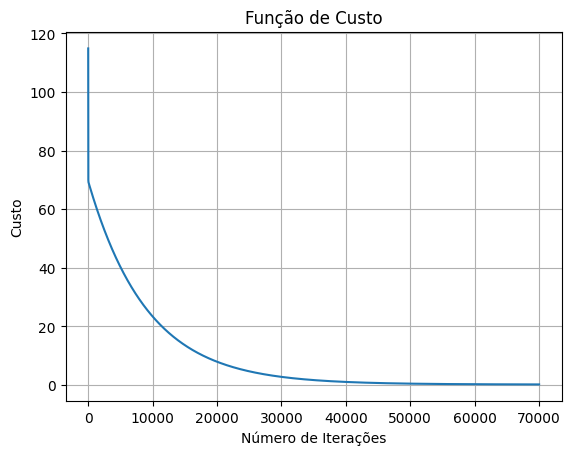

Custo(erro) após 70000 iterações: 0.18309875041296036


In [51]:
trainer = LMSTrainer()
predictor = trainer.fit(X_train, y_train)

Podemos observar pelo gráfico que o custo apresentou uma queda muito brusca nas iterações iniciais do treinamento, porém após 10 iterações aproximadamente percebemos uma queda mais suave na curva do erro, aproximando-se cada vez mais do 0.

Temos, então, que o **erro do treino** é dado por 0.18309875041296036 após 70000 iterações.

Após o treinamento, possuímos os valores de theta que mais se ajustam aos dados fornecidos. Agora, iremos realizar o teste com os valores de X e y reservados para o teste e observaremos o valor de y real e o valor de y  previsto pelo algoritmo. Além disso, observaremos o erro de teste.

In [52]:
trainer.predict(X_test, y_test)

y previsto:
[136.71497692181296, 118.94750278496332, 127.97921646203446, 127.05148334490113, 107.30290860028292, 116.26481990090606, 116.97847808366168, 130.06908087158644, 138.2293212837332, 127.87726557880562, 128.88257883155907, 121.18702550876304, 121.4027965254321, 137.36660129830614, 129.8351687398017, 133.3071101590711, 117.73094340887866, 123.07501350833493, 112.69797437957894, 121.5777173268011, 125.9749516928226, 119.79125352875488, 119.92008880376483, 126.79024519893521, 121.18419278687767, 114.7271630727077, 107.76287368452509, 136.4076105155849, 121.00407246704532, 126.12692408950062, 131.03338173113644, 126.63871415033952, 114.9882338810378, 123.78748564950688, 125.29734380246035, 117.58141011358478, 128.17681935314764, 120.06039674626615, 107.61881613308273, 118.76044539642987, 120.48086804284517, 124.40009569850102, 106.89215402042134, 119.55249905233507, 123.8066256696449, 115.37967517146542, 135.17087902745243, 124.09042980734253, 133.7087392226773, 124.70437808286843

Podemos observar com os dados de treino que os valores previstos com base nos dados de treinamento foram bastante próximos dos dados reais tendo um **erro de teste** de 19.58247515502379.

# Conclusão

Após essa análise, podemos perceber que o algoritmo do gradiente descendente oferece um bom desempenho na tarefa de predição. No entanto, é importante notar que o gradiente descendente exige uma quantidade considerável de iterações até atingir a convergência.

Neste trabalho, a tarefa mais desafiadora foi a necessidade de ajustar os parâmetros do gradiente, como a taxa de aprendizado e o número de iterações, até encontrar a combinação que garantisse uma boa convergência. A taxa de aprendizado desempenha um papel crucial no sucesso do treinamento, e encontrar o valor adequado foi basicamente um processo de tentativa e erro. Além disso, foi necessário alterar o número de iterações diversas vezes para evitar uma convergência prematura ou excessivamente lenta.

Em resumo, pode-se observar que o gradiente descendente é uma ferramenta valiosa, mas é importante dedicar tempo ao ajuste fino dos parâmetros para obter resultados satisfatórios.
